In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=d077dcf2ea51233982abb045d0761b66f3dce9a24f7d6cdcff8efb452d542759
  Stored in directory: c:\users\asadi\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import datasets, layers, losses

### make circles

In [4]:
x, y = make_circles(n_samples=500, shuffle=True, noise=0.02)

In [10]:
df = pd.DataFrame()
df["x"] = np.array(x[:,0])
df["y"] = np.array(x[:,1])
df["label"] = np.array(y)

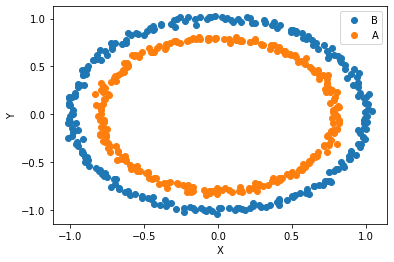

In [13]:
groups = df.groupby("label")
for label, dots in groups:
    plt.plot(dots["x"], dots["y"], marker="o", linestyle="", label=("A" if label == 1 else "B"))
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### now we make training and test groups

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.33, random_state=42)

### then we make our model

In [18]:
model = Sequential()
model.add(layers.Dense(10, input_dim=2, kernel_initializer='he_uniform'))
model.add(layers.Dense(6, kernel_initializer='he_uniform'))
model.add(layers.Dense(1, kernel_initializer='he_uniform'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 28ms/step - loss: 6.8181 - accuracy: 0.4776 - val_loss: 6.9459 - val_accuracy: 0.5212
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 6.9048 - accuracy: 0.4746 - val_loss: 6.8773 - val_accuracy: 0.5152
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 6.8958 - accuracy: 0.4776 - val_loss: 6.8761 - val_accuracy: 0.5152
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 6.8162 - accuracy: 0.4776 - val_loss: 6.9445 - val_accuracy: 0.5212
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 6.7279 - accuracy: 0.4776 - val_loss: 6.9481 - val_accuracy: 0.5212
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 6.7240 - accuracy: 0.4776 - val_loss: 6.9504 - val_accuracy: 0.5212
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 6.7251 - accuracy: 0.4776 - val_loss: 6.9506 - val_accuracy: 0.5212
Epoch 8/10
11/11 [=

### as we see we have no improvement in our accuracy and that's because we have no activation function

In [29]:
def linear(x):
  return (10*x) + 4
model2 = Sequential()
model2.add(layers.Dense(10, input_dim=2, kernel_initializer='he_uniform', activation = linear))
model2.add(layers.Dense(6, kernel_initializer='he_uniform', activation = linear))
model2.add(layers.Dense(1, kernel_initializer='he_uniform', activation = linear))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 18ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 7/10
11/11 [==============================] - 0s 6ms/step - loss: 7.1619 - accuracy: 0.5313 - val_loss: 6.3908 - val_accuracy: 0.5818
Epoch 8/10
11/11 [=

### the main goal of using an activation function is to make the outputs not linear. because in that case it would be like we have only one layer. so this does not work to

In [33]:
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 16ms/step - loss: 17425.5664 - accuracy: 0.4866 - val_loss: 3922.2466 - val_accuracy: 0.5273
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 1347.4089 - accuracy: 0.4955 - val_loss: 307.1280 - val_accuracy: 0.4727
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 829.1904 - accuracy: 0.5134 - val_loss: 749.4431 - val_accuracy: 0.4727
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 359.2084 - accuracy: 0.5134 - val_loss: 14.6979 - val_accuracy: 0.4242
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 29.5632 - accuracy: 0.5284 - val_loss: 68.2735 - val_accuracy: 0.5273
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 49.2091 - accuracy: 0.4866 - val_loss: 7.4576 - val_accuracy: 0.5273
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 3.2379 - accuracy: 0.5134 - val_loss: 6.9810 - val_accuracy: 0.47

### now using a better loss function at least we have a better error resault. but we are just fooling ourself because this does not have any impact in the learning process

In [35]:
def linear(x):
  return (10*x) + 4
model3 = Sequential()
model3.add(layers.Dense(32, input_dim=2, kernel_initializer='he_uniform', activation = linear))
model3.add(layers.Dense(1, kernel_initializer='he_uniform', activation = linear))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                96        
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [36]:
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 16ms/step - loss: 11636.8340 - accuracy: 0.5104 - val_loss: 10322.5098 - val_accuracy: 0.5273
Epoch 2/10
11/11 [==============================] - 0s 5ms/step - loss: 7920.2207 - accuracy: 0.4896 - val_loss: 6690.7749 - val_accuracy: 0.5273
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 5105.7959 - accuracy: 0.4866 - val_loss: 4122.1787 - val_accuracy: 0.5273
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 3140.4590 - accuracy: 0.4866 - val_loss: 2379.3655 - val_accuracy: 0.5273
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 1768.2101 - accuracy: 0.4866 - val_loss: 1292.3898 - val_accuracy: 0.5273
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 911.6985 - accuracy: 0.4896 - val_loss: 655.0043 - val_accuracy: 0.5455
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 447.6159 - accuracy: 0.4866 - val_loss: 285.0881 - 

### having just one layer doesn't make anything better ether
### so now lets make our own neural network

In [40]:
def linear(x):
  return (10*x) + 4
model4 = Sequential()
model4.add(layers.Dense(10, input_dim=2, kernel_initializer='he_uniform', activation = "relu"))
model4.add(layers.Dense(6, kernel_initializer='he_uniform', activation = "relu"))
model4.add(layers.Dense(1, kernel_initializer='he_uniform', activation = "sigmoid"))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 6)                 66        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [44]:
model4.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.1), loss='mse', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 27ms/step - loss: 0.2156 - accuracy: 0.7045 - val_loss: 0.1604 - val_accuracy: 0.8121
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 0.1264 - accuracy: 0.8657 - val_loss: 0.0812 - val_accuracy: 0.9394
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 0.0834 - accuracy: 0.8985 - val_loss: 0.0726 - val_accuracy: 0.9030
Epoch 4/10
11/11 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9821 - val_loss: 0.0266 - val_accuracy: 0.9939
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9731 - val_loss: 0.0399 - val_accuracy: 0.9576
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9910 - val_loss: 0.0402 - val_accuracy: 0.9455
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.0269 - accuracy: 0.9612 - val_loss: 0.0064 - val_accuracy: 0.9939
Epoch 8/10
11/11 [=

### it has been great !!!

# Part 2

### lets make a model for fashion_mnist dataset

In [45]:
from keras.datasets import fashion_mnist

In [47]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: 403 -- Forbidden

### lets reshape them

In [48]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainy = trainy.reshape((trainy.shape[0] , 1))
testy = testy.reshape((testy.shape[0] , 1))

NameError: name 'trainX' is not defined

### Unfortunately I cant download the data and I dont have the time to fix it -___-
### I know how to do this homework and I write the code but I cant run and test it ,,,, pleeaaase give me the score.

In [51]:
from keras.optimizers import adam_v2
opt_final = adam_v2.Adam(lr=0.01)

model_mnist = Sequential()
model_mnist.add(layers.Dense(100, input_shape=(28, 28, 1) , activation = 'relu'))
model_mnist.add(layers.Dense(150 , activation = 'relu'))
model_mnist.add(layers.Dense(10 , activation = 'softmax'))

model_mnist.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 28, 28, 100)       200       
                                                                 
 dense_22 (Dense)            (None, 28, 28, 150)       15150     
                                                                 
 dense_23 (Dense)            (None, 28, 28, 10)        1510      
                                                                 
Total params: 16,860
Trainable params: 16,860
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_mnist.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.01), metrics=['accuracy'])
history_mnist = model_mnist.fit(trainX, trainy, epochs=30)

NameError: name 'trainX' is not defined